# **4Geeks Insurance S.L.**

**Business Insight**

Analyzing the data will help 4Geeks Insurance S.L. identify key factors affecting health insurance costs, such as age, BMI, and smoking status. These insights will enable more accurate risk assessment, personalized premium pricing, and better customer segmentation—ultimately leading to improved profitability and customer satisfaction.

**Description of the problem**

Health insurance premiums vary widely depending on individual factors such as age, lifestyle, and medical history. 4Geeks Insurance S.L. wants to use this information to predict the insurance cost for each customer more accurately. By analyzing a dataset that includes demographic and physiological data, the goal is to understand the key variables that influence premium pricing and build a model that supports fair and data-driven premium calculation.

To address this problem, we will build a regression model to help predict the health insurance premium for each customer based on the data.

### **Exploratory Data Analysis (EDA)**

###  **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

###  **Problem statement and data collection**

In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


### **Exploration and data cleaning**

**Understanding the features**

- **age**: Age of primary beneficiary (numeric)

- **sex*:. Gender of the primary beneficiary (categorical)

- **bmi**: Body mass index (numeric)

- **children**: Number of children/dependents covered by health insurance (numeric)

- **smoker**: Is the person a smoker? (categorical)

- **region**: Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)

- **charges**: Health insurance premium (numerical)

In [3]:
print('The dataframe contains {} rows and it has {} features.'.format(len(total_data), total_data.shape[1]))

The dataframe contains 1338 rows and it has 7 features.


In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Conclusions

- The dataset contains 1,338 entries and no missing values across any of the 7 columns, which ensures it is clean and ready for analysis and modeling without requiring imputation.

- Numerical features: age, bmi, children, and charges.

- Categorical features: sex, smoker, and region.

- The target variable is charges (health insurance cost), which is a continuous numerical variable, confirming that this is a regression problem.

**Eliminate duplicates**

In [5]:
total_data.isna().sum()[total_data.isna().sum()>0]

Series([], dtype: int64)

Conclusions:

The dataset don't have any nulls neither duplicated values in the dataframe and we have categorical and numerical features.

**Eliminate irrelevant information**

In [6]:
total_data.drop(["region"], axis = 1, inplace = True)
total_data.head(3)

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.9240
1,18,male,33.77,1,no,1725.5523
2,28,male,33.00,3,no,4449.4620


In [7]:
clean_data = total_data.copy()
clean_data.head(3)

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.9240
1,18,male,33.77,1,no,1725.5523
2,28,male,33.00,3,no,4449.4620


### **Analysis of univariate variables**

Dividing our dataset into categorial and numerical.

**Categorical Variables - Analysis and Conclusions**

In [8]:
categorical_variables = clean_data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Variables:", categorical_variables)

Categorical Variables: ['sex', 'smoker']


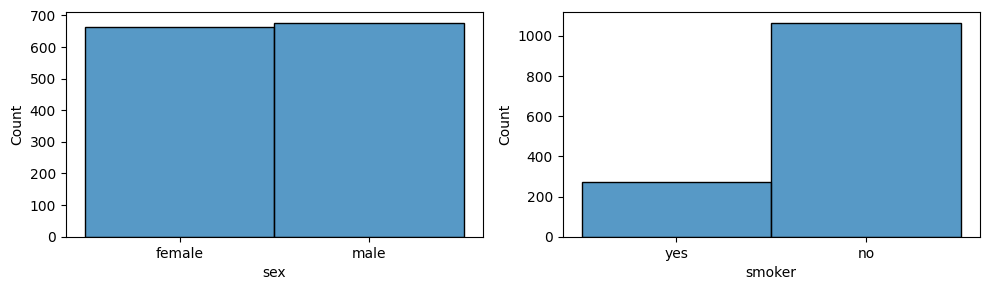

In [9]:
fig, axis = plt.subplots(1,2, figsize=(10,3)) 

sns.histplot(ax = axis[0], data = clean_data, x = "sex")
sns.histplot(ax = axis[1], data = clean_data, x = "smoker")

plt.tight_layout()
plt.show()

Conclusions

- Gender Distribution (sex):

The gender distribution in the dataset is fairly balanced, with a slightly higher number of females than males. This balance ensures that models trained on this data will not be biased toward one gender.

- Smoking Status (smoker):

The dataset shows a strong imbalance between smokers and non-smokers. There are over 1,000 non-smokers compared to just over 200 smokers.
This could have a significant impact on the charges variable, as smoking is a known risk factor that often leads to higher insurance costs.

**Numerical Variables - Analysis and Conclusions**

In [10]:
numerical_variables = clean_data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Variables:", numerical_variables)

Numerical Variables: ['age', 'bmi', 'children', 'charges']


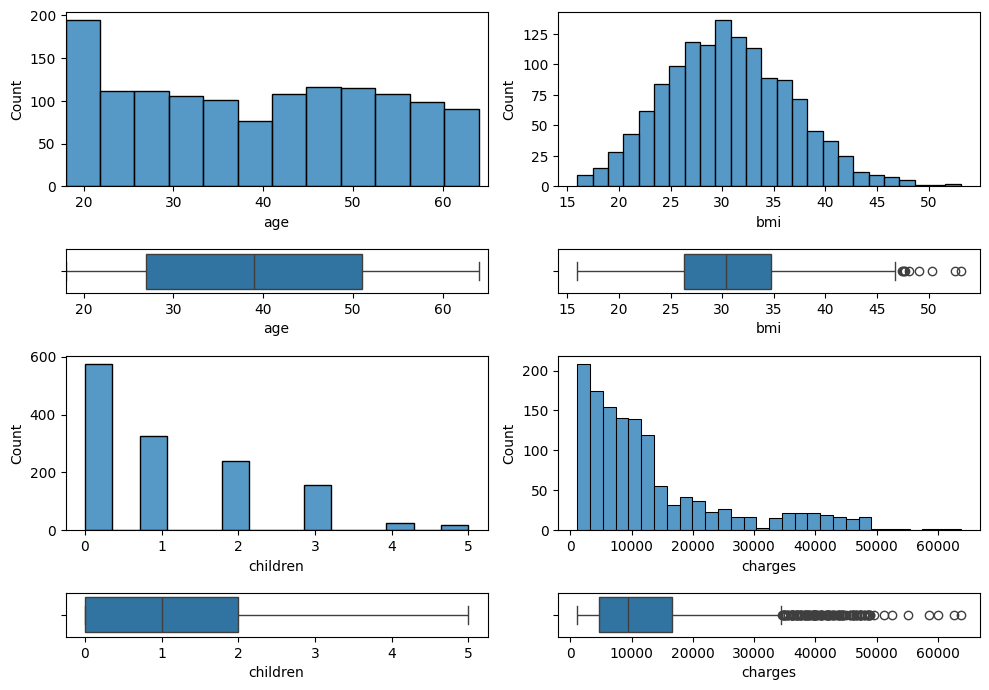

In [11]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw = {"height_ratios": [4, 1, 4, 1]})

sns.histplot(ax = axis[0, 0], data = clean_data, x = "age").set_xlim(18, 65)
sns.boxplot(ax = axis[1, 0], data = clean_data, x = "age").set_xlim(18, 65)

sns.histplot(ax = axis[0, 1], data = clean_data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = clean_data, x = "bmi")

sns.histplot(ax = axis[2, 0], data = clean_data, x = "children")
sns.boxplot(ax = axis[3, 0], data = clean_data, x = "children")

sns.histplot(ax = axis[2, 1], data = clean_data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = clean_data, x = "charges")

plt.tight_layout()
plt.show()

Conclusiones

 1. Age
 
- Distribution: The age distribution is relatively uniform but skewed toward younger individuals, with the highest count in the 18–20 range.

- Boxplot: The age data is evenly spread, with no significant outliers.

2. BMI (Body Mass Index)

- Distribution: The BMI distribution is close to normal, centered around 30, which is the threshold for obesity.

- Boxplot: There are visible outliers on the higher end (BMI > 45), indicating some individuals with extremely high BMI values.

3. Children

- Distribution: The vast majority of individuals have 0 to 2 children, with very few having 4 or 5.

- Boxplot: Slightly right-skewed, but no outliers.

4. Charges

- Distribution: The charges are highly right-skewed, with most people paying below $15,000, and a few paying over $50,000.

- Boxplot: There are many outliers on the higher end, likely due to factors like smoking or chronic conditions.

### **Multivariate Analysis**

**- Categorical vs Categorical Analysis**

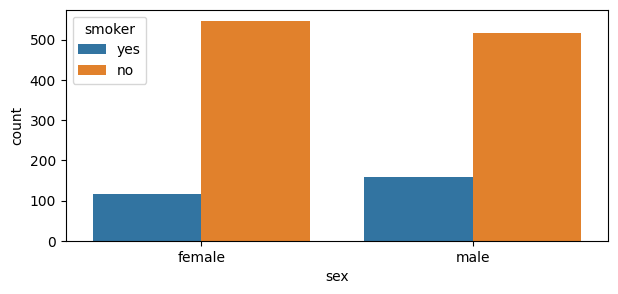

In [12]:
fig, axis = plt.subplots( figsize = (7, 3))

sns.countplot(x="sex", hue="smoker", data= clean_data)

fig.subplots_adjust(hspace=0.4, wspace=0.2)
plt.show()

Conclusions

Relationship Between Smoking Status and Gender

- The relationship between smoking status and gender shows that the distribution is relatively balanced overall; however, there is a slightly higher proportion of male smokers compared to female smokers. This suggests that gender may play a minor role in smoking habits, which could, in turn, impact health insurance costs, as smoking is a known factor for higher medical expenses.



**- Numerical vs Numerical Analysis**

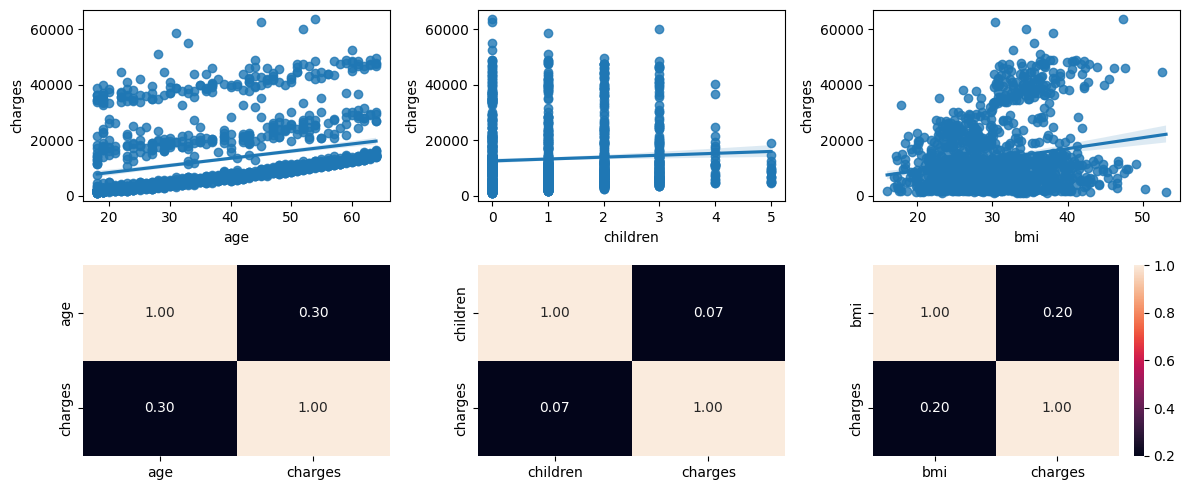

In [13]:
fig, axis = plt.subplots(2,3 , figsize = (12, 5))

sns.regplot(ax = axis[0, 0], data = clean_data, x = "age", y = "charges")
sns.heatmap(clean_data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = clean_data, x = "children", y = "charges")
sns.heatmap(clean_data[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = clean_data, x = "bmi", y = "charges")
sns.heatmap(clean_data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2]).set(ylabel = None)


plt.tight_layout()

plt.show()

Conclusions

1. Age vs. Charges

- There is a positive trend between age and charges, especially noticeable after age 40.

- Correlation coefficient of  0.30 indicates a moderate positive correlation: as age increases, charges tend to rise.

- Older individuals generally have higher insurance costs, which aligns with real-world expectations due to increased health risks with age.

2. Children vs. Charges

- No clear trend is visible; individuals with and without children can have both low and high charges.

- Correlation coefficient of 0.07 indicates a very weak correlation between number of children and insurance charges.

- The number of children appears to have little to no impact on insurance cost.

3. BMI vs. Charges

- There are notable outliers with both high BMI and high charges — possibly smokers or individuals with chronic conditions.

- Correlation coefficient of 0.20 indicates a weak to moderate correlation.

- Higher BMI tends to slightly increase insurance charges, but the relationship is not very strong on its own. The influence may be stronger when combined with other factors like smoking.

**- Numerical vs. Categorical Analysis**

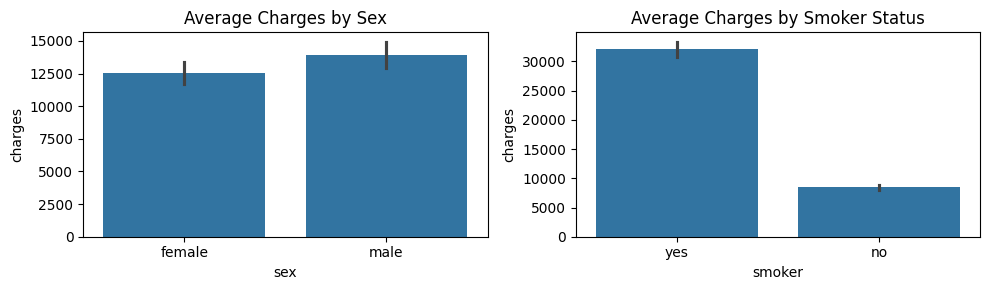

In [14]:
fig, axis = plt.subplots(1, 2, figsize=(10, 3))

sns.barplot(data=total_data, x="sex", y="charges", estimator='mean', ax=axis[0])
sns.barplot(data=total_data, x="smoker", y="charges", estimator='mean', ax=axis[1])

axis[0].set_title("Average Charges by Sex")
axis[1].set_title("Average Charges by Smoker Status")

plt.tight_layout()
plt.show()

Conclusions

1. Sex vs. Charges

- The relationship between sex and insurance charges shows only a minor difference. On average, male and female customers have similar insurance costs, suggesting that gender does not play a major role in premium pricing.

2. Smoker vs. Charges

- The relationship between smoking status and charges reveals a strong impact.

- Smokers pay up to 3 times more than non-smokers on average.
This clearly indicates that smoking is one of the most influential factors in determining insurance cost and must be treated as a key predictor in the model.

### **Correlations Analysis**

Factorize categorical values and save it.

In [15]:
categorical_f_rules = {}

for col in categorical_variables:
    encoded_col = f"{col}_n"
    clean_data[encoded_col], uniques = pd.factorize(clean_data[col])
    dicc = dict(zip(uniques, range(len(uniques))))
    categorical_f_rules[col] = dicc

with open("categorical_rules.json", "w") as f:
    json.dump(categorical_f_rules, f)

with open("categorical_rules.json", "r") as f:
    loaded_mappings = json.load(f)

clean_data.head()

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
0,19,female,27.900,0,yes,16884.92400,0,0
1,18,male,33.770,1,no,1725.55230,1,1
2,28,male,33.000,3,no,4449.46200,1,1
3,33,male,22.705,0,no,21984.47061,1,1
4,32,male,28.880,0,no,3866.85520,1,1


**Analysing all the Data at Once**

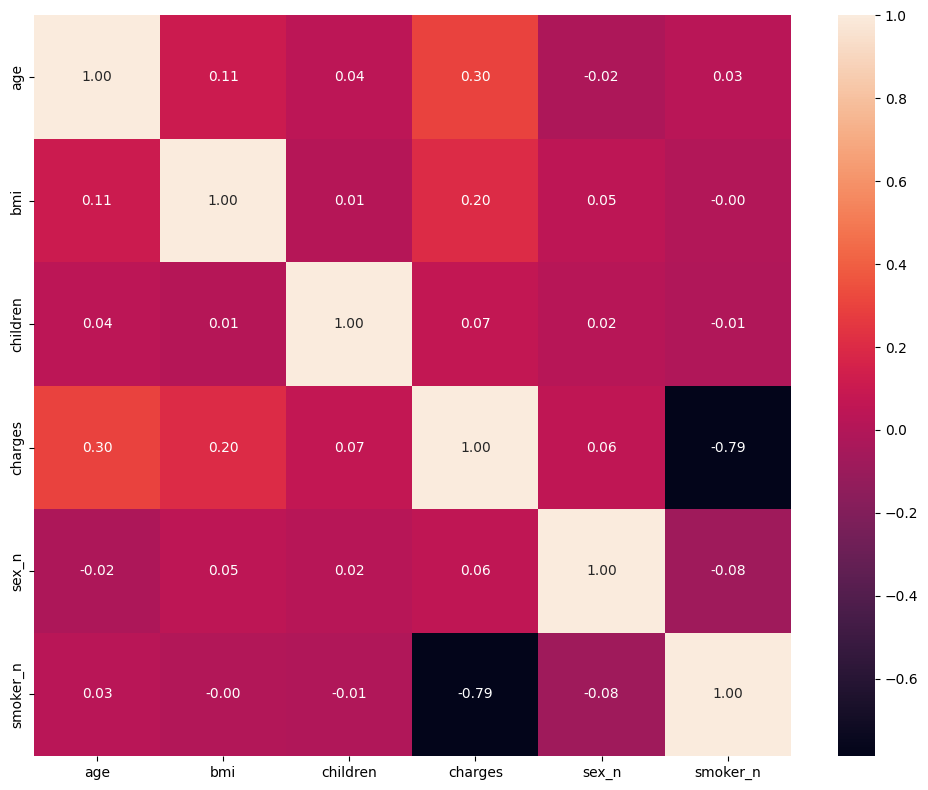

In [16]:
fig, axes = plt.subplots(figsize=(10, 8))

sns.heatmap(clean_data[["age", "bmi", "children", "charges", "sex_n", "smoker_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

Conclusions

 1. Strongest Correlation with Charges: smoker_n

- Correlation coefficient: -0.79. This is a strong negative correlation, meaning: As smoker_n increases, charges decrease significantly. In other words, being a smoker significantly increases insurance charges.

- Smoking status is the most influential feature affecting health insurance cost.

2. Moderate Correlations with Charges

- age: 0.30. Older individuals tend to have higher charges. This aligns with health risks increasing with age.

- bmi: 0.20. Higher BMI is associated with slightly higher charges. However, the effect is weaker than age or smoking.

- Age has a moderate impact; BMI is a weaker but still relevant factor.

3. Weak or Negligible Correlations

- children: 0.07, sex_n: 0.06

- The number of children and sex have minimal influence on charges and may not add much predictive power.



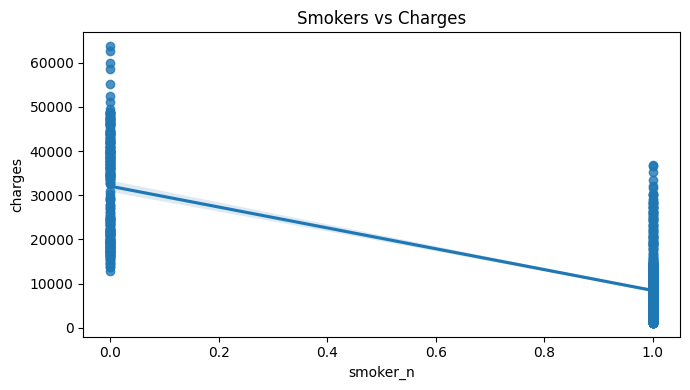

In [17]:
#Smoker vs. Charges – Visual Confirmation

fig, axes = plt.subplots( figsize=(7, 4))

sns.regplot(x='smoker_n',y='charges',data=clean_data).set_title("Smokers vs Charges")

plt.tight_layout()
plt.show()

Conclusions

The new plot clearly illustrates a strong inverse relationship between smoker_n (0 = smoker, 1 = non-smoker) and charges.

There is a sharp decrease in charges when moving from smokers (0) to non-smokers (1).

This confirms that smokers are charged significantly higher premiums compared to non-smokers — a difference that is visually linear and substantial.

**Numerical - Categorical Analysis**

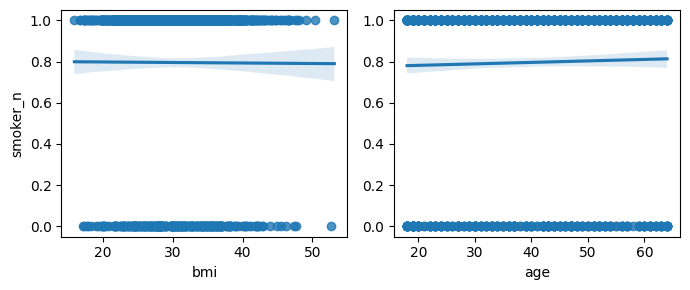

In [18]:
fig, axis = plt.subplots(figsize = (7, 3), ncols = 2)
sns.regplot(ax = axis[0], data = clean_data, x = "bmi", y = "smoker_n")
sns.regplot(ax = axis[1], data = clean_data, x = "age", y = "smoker_n").set(ylabel = None)

plt.tight_layout()
plt.show()

Conclusions

1. BMI vs Smoker

- The plot shows that the regression line remains flat, indicating no significant linear relationship between BMI and smoking status.

- However, the horizontal spread suggests that BMI values vary widely within both smoker and non-smoker groups.

2. Age vs Smoker

- The regression line trends upward slightly, implying that older individuals may be slightly more likely to smoke.

- The spread is subtle, indicating that although the trend exists, the effect is weak.

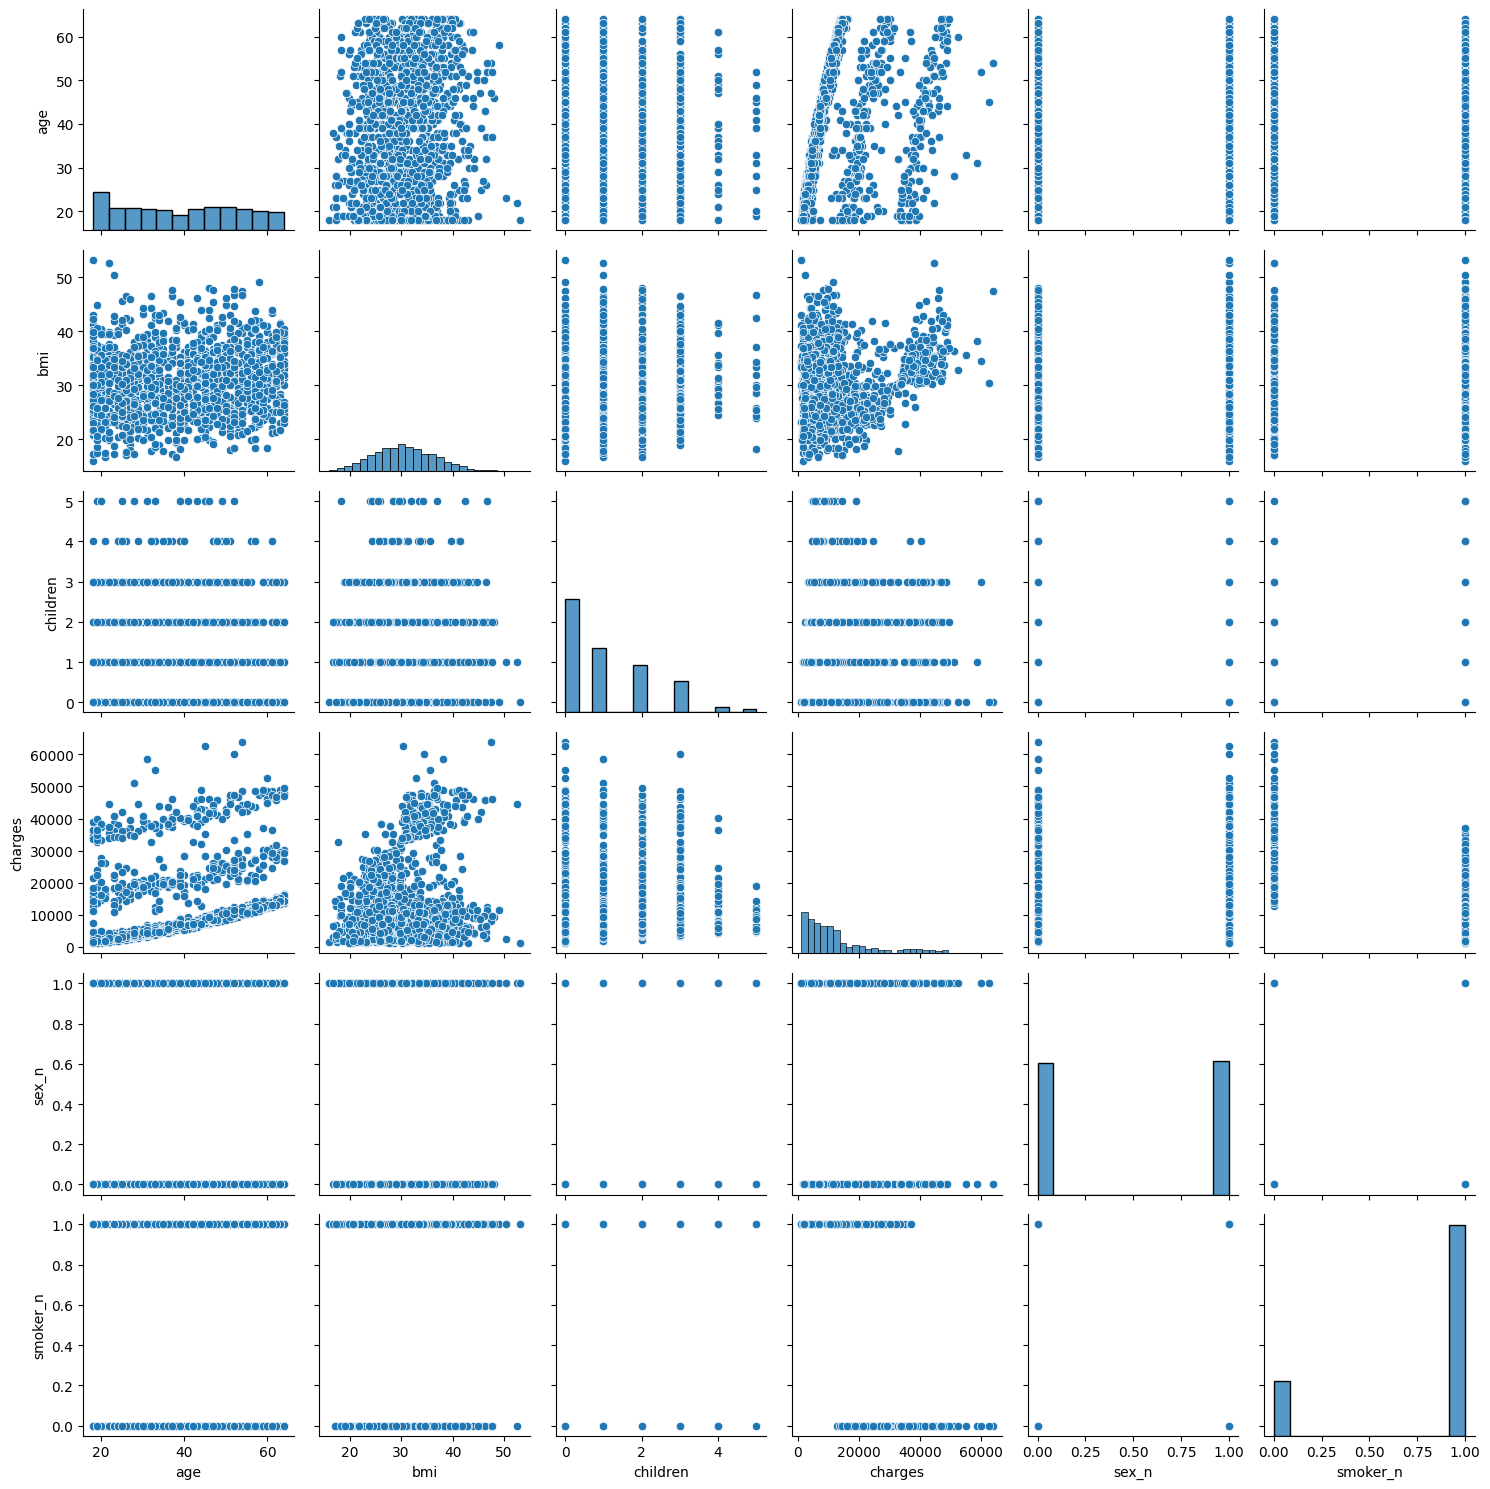

In [19]:
sns.pairplot(data = clean_data)
plt.tight_layout()
plt.show()

### **Feature Engineering**

**- Outliers Analysis**

In [20]:
clean_data.describe()

,age,bmi,children,charges,sex_n,smoker_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


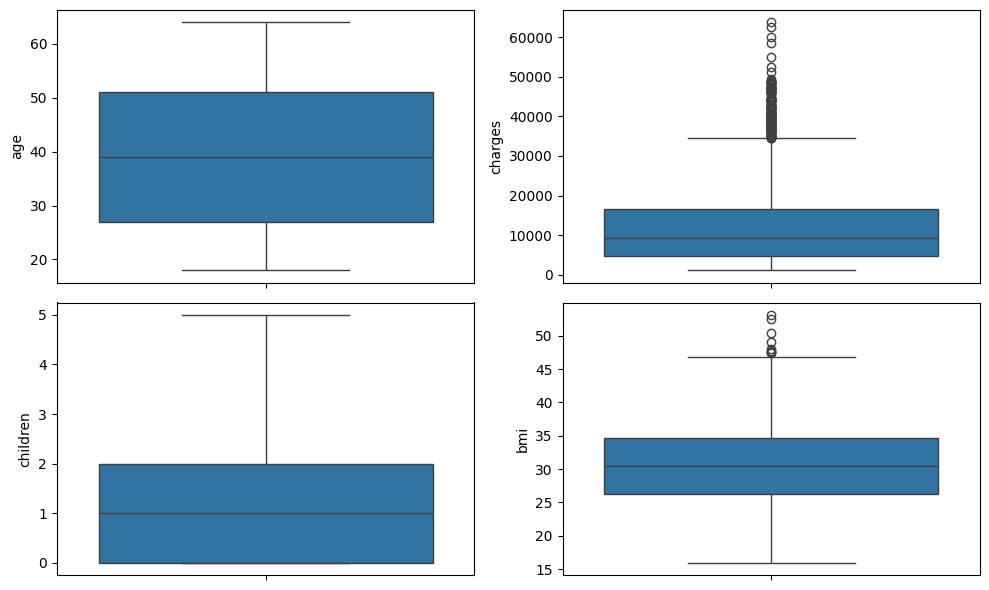

In [21]:
fig, axes = plt.subplots(2, 2, figsize = (10, 6))

sns.boxplot(ax = axes[0, 0], data = clean_data, y = "age")
sns.boxplot(ax = axes[0, 1], data = clean_data, y = "charges")
sns.boxplot(ax = axes[1, 0], data = clean_data, y = "children")
sns.boxplot(ax = axes[1, 1], data = clean_data, y = "bmi")


plt.tight_layout()

plt.show()

**Finding Outliers**

In [22]:
numerical_columns = [
  "age", 
  "bmi", 
  "children", 
  "charges", 
  ]

for column in numerical_columns:
    stats = clean_data[column].describe()
    iqr = stats["75%"] - stats["25%"]
    upper_limit = stats["75%"] + 1.5 * iqr
    lower_limit = stats["25%"] - 1.5 * iqr
    if lower_limit < 0:
      lower_limit = 0
    
    outliers = clean_data[(clean_data[column] < lower_limit) | (clean_data[column] > upper_limit)]
    outlier_count = outliers.shape[0]

    print(f"{column.capitalize()} — IQR: {round(iqr, 2)}, Upper limits: {round(upper_limit, 2)}, Lowerlimits: {round(lower_limit, 2)}")
    print(f"Total de outliers: {outlier_count}\n")

Age — IQR: 24.0, Upper limits: 87.0, Lowerlimits: 0
Total de outliers: 0

Bmi — IQR: 8.4, Upper limits: 47.29, Lowerlimits: 13.7
Total de outliers: 9

Children — IQR: 2.0, Upper limits: 5.0, Lowerlimits: 0
Total de outliers: 0

Charges — IQR: 11899.63, Upper limits: 34489.35, Lowerlimits: 0
Total de outliers: 139



**Eliminating outliers**

In [23]:
# Base dataset
clean_data_with_outliers = clean_data.copy()

# Copy to process and remove outliers
clean_data_no_outliers = clean_data.copy()


def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])

  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)

  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['age', 'bmi', 'children']:
  clean_data_no_outliers, limit_list = replace_outliers_from_column(column, clean_data_no_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'age': [18, np.float64(87.0)],
 'bmi': [np.float64(13.7), np.float64(47.290000000000006)],
 'children': [0, np.float64(5.0)]}

In [24]:
clean_data_with_outliers.head(3)

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
0,19,female,27.90,0,yes,16884.9240,0,0
1,18,male,33.77,1,no,1725.5523,1,1
2,28,male,33.00,3,no,4449.4620,1,1


In [25]:
clean_data_no_outliers.head(3)

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
0,19,female,27.90,0,yes,16884.9240,0,0
1,18,male,33.77,1,no,1725.5523,1,1
2,28,male,33.00,3,no,4449.4620,1,1


In [26]:
clean_data_with_outliers.isnull().sum().sort_values(ascending = False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
sex_n       0
smoker_n    0
dtype: int64

In [27]:
clean_data_no_outliers.isnull().sum().sort_values(ascending = False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
sex_n       0
smoker_n    0
dtype: int64

**Split Train & Test**

In [28]:
# Define numeric features
num_features = ["age", "bmi", "children" ,"sex_n", "smoker_n"  ]

# Define target
target = "charges"

# Dataset with outliers
x_WITH = clean_data_with_outliers[num_features]
y = clean_data_with_outliers[target]
X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_test_split(x_WITH, y, test_size=0.2, random_state=42)

# Dataset without outliers
x_NO = clean_data_no_outliers[num_features]
X_train_no_outliers, X_test_no_outliers = train_test_split(x_NO, test_size=0.2, random_state=42)

**Feature Scaling**

**-Normalizer**

In [29]:
### Normalize the dataframe with outliers and save it.
normalizer_with_outliers = StandardScaler()
normalizer_with_outliers.fit(X_train_with_outliers)

X_train_with_outliers_norm = normalizer_with_outliers.transform(X_train_with_outliers)
X_train_with_outliers_norm = pd.DataFrame(X_train_with_outliers_norm, index = X_train_with_outliers.index, columns = num_features)

X_test_with_outliers_norm = normalizer_with_outliers.transform(X_test_with_outliers)
X_test_with_outliers_norm = pd.DataFrame(X_test_with_outliers_norm, index = X_test_with_outliers.index, columns = num_features)


### Normalize the dataframe without outliers and save it.
normalizer_no_outliers = StandardScaler()
normalizer_no_outliers.fit(X_train_no_outliers)

X_train_no_outliers_norm = normalizer_no_outliers.transform(X_train_no_outliers)
X_train_no_outliers_norm = pd.DataFrame(X_train_no_outliers_norm, index = X_train_no_outliers.index, columns = num_features)

X_test_no_outliers_norm = normalizer_no_outliers.transform(X_test_no_outliers)
X_test_no_outliers_norm = pd.DataFrame(X_test_no_outliers_norm, index = X_test_no_outliers.index, columns = num_features)

X_train_with_outliers_norm.head(3)

,age,bmi,children,sex_n,smoker_n
560,0.472227,-1.756525,0.734336,-1.024602,0.508747
1285,0.543313,-1.033082,-0.911192,-1.024602,0.508747
1142,0.898745,-0.943687,-0.911192,-1.024602,0.508747


**-Min-Max Scaler**

In [30]:
### Scale the dataframe with outliers and save it
scaler_with_outliers = MinMaxScaler()
scaler_with_outliers.fit(X_train_with_outliers)

X_train_with_outliers_scal = scaler_with_outliers.transform(X_train_with_outliers)
X_train_with_outliers_scal = pd.DataFrame(X_train_with_outliers_scal, index = X_train_with_outliers.index, columns = num_features)

X_test_with_outliers_scal = scaler_with_outliers.transform(X_test_with_outliers)
X_test_with_outliers_scal = pd.DataFrame(X_test_with_outliers_scal, index = X_test_with_outliers.index, columns = num_features)


### Scale the dataframe without outliers and save it
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_no_outliers)

X_train_no_outliers_scal = scaler_sin_outliers.transform(X_train_no_outliers)
X_train_no_outliers_scal = pd.DataFrame(X_train_no_outliers_scal, index = X_train_no_outliers.index, columns = num_features)

X_test_no_outliers_scal = scaler_sin_outliers.transform(X_test_no_outliers)
X_test_no_outliers_scal = pd.DataFrame(X_test_no_outliers_scal, index = X_test_no_outliers.index, columns = num_features)

X_train_with_outliers_scal.head(3)

,age,bmi,children,sex_n,smoker_n
560,0.608696,0.107345,0.4,0.0,1.0
1285,0.630435,0.224913,0.0,0.0,1.0
1142,0.739130,0.239440,0.0,0.0,1.0


**Save the clean and raw data**

In [31]:
dataframes = {
    "X_train_with_outliers": X_train_with_outliers,
    "X_train_no_outliers": X_train_no_outliers,
    "X_train_with_outliers_norm": X_train_with_outliers_norm,
    "X_train_no_outliers_norm": X_train_no_outliers_norm,
    "X_train_with_outliers_scal": X_train_with_outliers_scal,
    "X_train_no_outliers_scal": X_train_no_outliers_scal,
    "X_test_with_outliers": X_test_with_outliers,
    "X_test_no_outliers": X_test_no_outliers,
    "X_test_with_outliers_norm": X_test_with_outliers_norm,
    "X_test_no_outliers_norm": X_test_no_outliers_norm,
    "X_test_with_outliers_scal": X_test_with_outliers_scal,
    "X_test_no_outliers_scal": X_test_no_outliers_scal,
    "y_train": y_train,
    "y_test": y_test,
    }

# Base path to save the files
save_path = "../data/processed/"

# Save the DataFrames in CSV
for name, df in dataframes.items():
    df.to_csv(f"{save_path}{name}.csv", index=False)

In [32]:
# Save the scaler and normalizer models
models = {
    "normalizer_with_outliers": normalizer_with_outliers,
    "normalizer_no_outliers": normalizer_no_outliers,
    "scaler_with_outliers": scaler_with_outliers,
    "scaler_no_outliers": scaler_sin_outliers,  
} 

save_path = "../models/"

for name, df in models.items():
    with open(f"{save_path}{name}.pkl", "wb") as file:
        pickle.dump(df, file)

In [54]:
selection_model = SelectKBest(score_func=f_regression, k=5)
selection_model.fit(X_train_with_outliers, y_train)

ix = selection_model.get_support()
X_train_with_outliers_sel = pd.DataFrame(selection_model.transform(X_train_with_outliers),columns=X_train_with_outliers.columns.values[ix])
X_test_with_outliers_sel = pd.DataFrame(selection_model.transform(X_test_with_outliers),columns=X_test_with_outliers.columns.values[ix])

In [49]:
X_train_with_outliers_sel.head()

,age,bmi,children,sex_n,smoker_n
0,46.0,19.95,2.0,0.0,1.0
1,47.0,24.32,0.0,0.0,1.0
2,52.0,24.86,0.0,0.0,1.0
3,39.0,34.32,5.0,0.0,1.0
4,54.0,21.47,3.0,0.0,1.0


In [35]:
selection_model = SelectKBest(score_func=f_regression, k=5)
selection_model.fit(X_train_with_outliers, y_train)

ix = selection_model.get_support()
X_train_no_outliers_sel = pd.DataFrame(selection_model.transform(X_train_with_outliers),columns=X_train_with_outliers.columns.values[ix])
X_test_no_outliers_sel = pd.DataFrame(selection_model.transform(X_test_with_outliers),columns=X_test_with_outliers.columns.values[ix])

In [36]:
X_train_no_outliers_sel.head()

,age,bmi,children,sex_n,smoker_n
0,46.0,19.95,2.0,0.0,1.0
1,47.0,24.32,0.0,0.0,1.0
2,52.0,24.86,0.0,0.0,1.0
3,39.0,34.32,5.0,0.0,1.0
4,54.0,21.47,3.0,0.0,1.0


### **Linear Regression Model**

In [ ]:
datasets = {
    "X_train_with_outliers": (X_train_with_outliers, X_test_with_outliers),
    "X_train_no_outliers": (X_train_no_outliers, X_test_no_outliers),
    "X_train_with_outliers_norm": (X_train_with_outliers_norm, X_test_with_outliers_norm),
    "X_train_no_outliers_norm": (X_train_no_outliers_norm, X_test_no_outliers_norm),
    "X_train_with_outliers_scal": (X_train_with_outliers_scal, X_test_with_outliers_scal),
    "X_train_no_outliers_scal": (X_train_no_outliers_scal, X_test_no_outliers_scal),
    "X_train_with_outliers_sel": (X_train_with_outliers_sel, X_test_with_outliers_sel),

}

results = {}
for name, (X_train, X_test) in datasets.items():
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R2': r2, 'MSE': mse}
    print(f"{name}: R² = {r2:.4f} | MSE = {mse:.4f}")

best_model_name = max(results, key=lambda k: results[k]['R2'])
print(f"\nThe best dataset is: {best_model_name}")
print(f"R²: {results[best_model_name]['R2']:.4f}")

print(f"MSE: {results[best_model_name]['MSE']:.4f}")

X_train_with_outliers: R² = 0.7811 | MSE = 33979257.0508
X_train_no_outliers: R² = 0.7802 | MSE = 34124835.0697
X_train_with_outliers_norm: R² = 0.7811 | MSE = 33979257.0508
X_train_no_outliers_norm: R² = 0.7802 | MSE = 34124835.0697
X_train_with_outliers_scal: R² = 0.7811 | MSE = 33979257.0508
X_train_no_outliers_scal: R² = 0.7802 | MSE = 34124835.0697
X_train_with_outliers_sel: R² = 0.7811 | MSE = 33979257.0508

The best dataset is: X_train_with_outliers
R²: 0.7811
MSE: 33979257.0508


**Grid Search**

In [ ]:
# Find the best parameters using the best dataset

X_train_best, X_test_best = datasets[best_model_name]

model = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_best, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

y_pred = grid_search.best_estimator_.predict(X_test_best)
test_r2 = r2_score(y_test, y_pred)
print(f"Test R² Score: {test_r2:.4f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'fit_intercept': True, 'positive': False}
Best CV R² Score: 0.7337447165061834
Test R² Score: 0.7811


**Ridge**

In [64]:
model = Ridge()

# Define the hyperparameter grid to search over:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'positive': [False]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_best, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R² CV Score:", grid_search.best_score_)

# Evaluate model performance
y_pred = grid_search.best_estimator_.predict(X_test_best)
test_r2 = r2_score(y_test, y_pred)
print(f"Test R² Score: {test_r2:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'alpha': 1, 'fit_intercept': True, 'positive': False}
Best R² CV Score: 0.7337727343981781
Test R² Score: 0.7809


**Lasso**

In [65]:
model = Lasso(max_iter=10000, random_state=42)

# Define the hyperparameter grid to search over:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Note: I use greater_is_better=False since lower MSE is better
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV on the training data 
grid_search.fit(X_train_best, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

# Evaluate model performance
y_pred = grid_search.best_estimator_.predict(X_test_best)
test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)

print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'alpha': 100, 'fit_intercept': True, 'positive': False}
Best CV R² Score: 0.734404764342762
Test R² Score: 0.7794
Test MSE: 34245278.3455


**ElasticNet**

In [ ]:
model = ElasticNet(max_iter=10000, random_state=42)

# Define the hyperparameter grid to tune:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1],
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_best, y_train)

# Display the best hyperparameters found
print("Best Parameters:", grid_search.best_params_)
print("Best CV R² Score:", grid_search.best_score_)

# Evaluate final performance
y_pred = grid_search.best_estimator_.predict(X_test_best)
test_r2 = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)

print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'alpha': 100, 'fit_intercept': True, 'l1_ratio': 1, 'positive': False}
Best CV R² Score: 0.734404764342762
Test R² Score: 0.7794
Test MSE: 34245278.3455


Conclusions

- Best model: The Grid Search on LinearRegression achieved the highest Test R² score (0.7811), slightly outperforming Ridge, Lasso, and ElasticNet on the test set.

- Runner-ups: Ridge, Lasso, and ElasticNet have very similar cross-validation and test scores, with Lasso and ElasticNet sharing the exact best parameters and performance, indicating a strong L1 regularization effect (alpha=100, l1_ratio=1 means pure Lasso).

- Worst model: None of the models perform drastically worse; however, Lasso and ElasticNet show a slightly lower test R² score and have a reported Test MSE, which is higher compared to what we'd expect from the others.

The very close CV R² scores (~0.733 - 0.734) indicate that all models generalize similarly on unseen data.

The simplest linear regression with grid search on fit_intercept and positive parameters gave the best test performance in this case. Regularized models (Ridge, Lasso, ElasticNet) yielded comparable but slightly lower test R². Given this, we might choose the simpler model for interpretability unless we want the regularization benefits like feature selection (Lasso) or multicollinearity handling (Ridge/ElasticNet).

If minimizing MSE is a priority, we may want to examine the MSE values more closely, but in terms of explained variance (R²), our best option is the basic Linear Regression with grid search tuning. 